In [1]:
pip install numpy scikit-learn opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


Model training completed and saved as 'weather_prediction_svm_model.pkl'


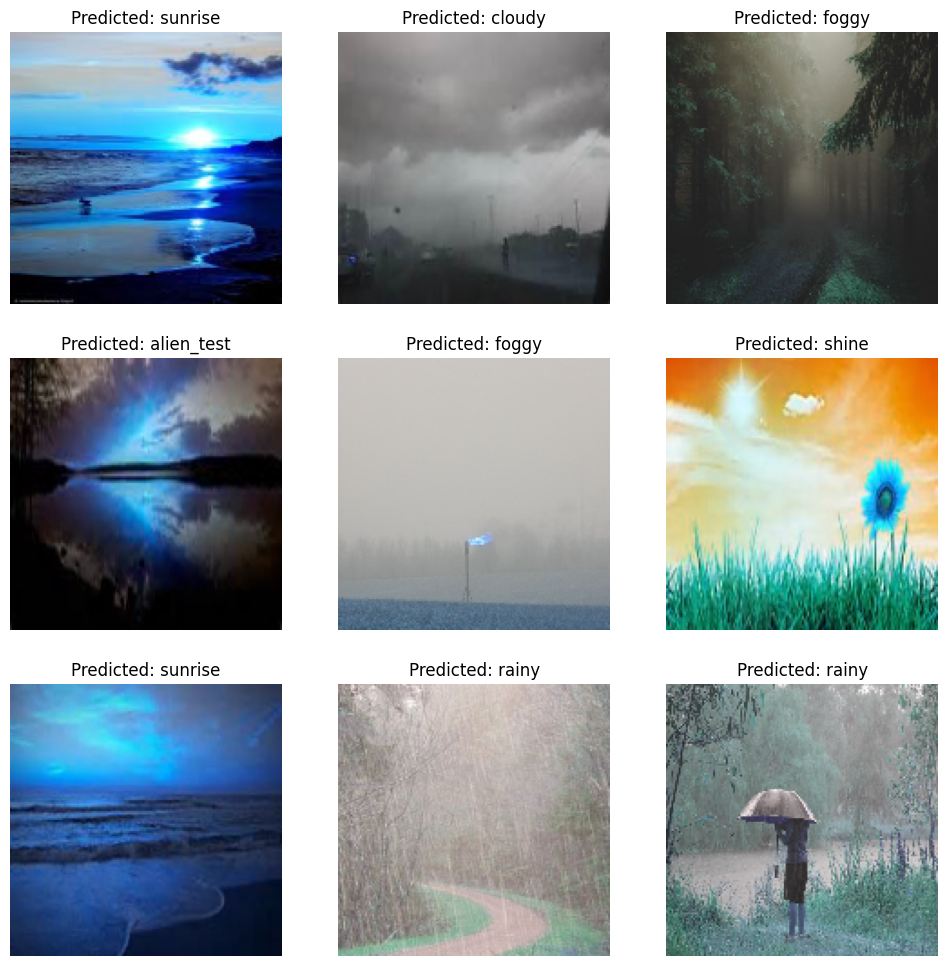

In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib

# Set dataset path
dataset_path = '/kaggle/input/multiclass-weather-dataset/dataset'

# Image parameters
img_width, img_height = 150, 150

# Load dataset
def load_dataset(dataset_path):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                if image is None:
                    continue  # Skip the image if it cannot be loaded
                image = cv2.resize(image, (img_width, img_height))
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_dataset(dataset_path)

# Check if dataset is loaded correctly
if len(images) == 0:
    raise ValueError("No images loaded. Please check the dataset path and ensure it contains images.")

# Preprocess dataset
images = images.astype('float32') / 255.0  # Normalize pixel values
images = images.reshape(len(images), -1)  # Flatten images

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Save the model
joblib.dump(svm_model, 'weather_prediction_svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model training completed and saved as 'weather_prediction_svm_model.pkl'")

# Plot some test images with their predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(img_width, img_height, 3))
    plt.title(f"Predicted: {label_encoder.inverse_transform([y_test[i]])[0]}")
    plt.axis('off')
plt.show()

The predicted weather condition is: cloudy


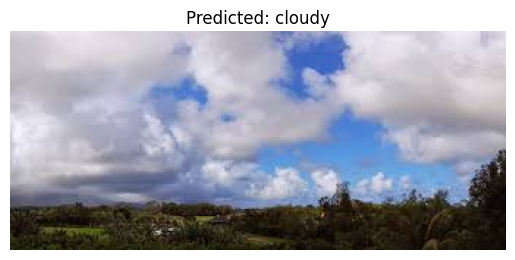

In [3]:
# Function to predict the weather category of an image
def predict_weather(image_path, model, label_encoder):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    resized_image = cv2.resize(image, (img_width, img_height))
    image_array = resized_image.astype('float32') / 255.0  # Normalize pixel values
    image_array = image_array.reshape(1, -1)  # Flatten image
    prediction = model.predict(image_array)
    predicted_class = label_encoder.inverse_transform(prediction)[0]
    return predicted_class, image

# Function to display the predicted image with label
def display_predicted_image(image, predicted_class):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Example usage
model = joblib.load('weather_prediction_svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')
image_path = '/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy101.jpg'
try:
    prediction, image = predict_weather(image_path, model, label_encoder)
    print(f'The predicted weather condition is: {prediction}')
    display_predicted_image(image, prediction)
except ValueError as e:
    print(e)

The predicted weather condition is: foggy


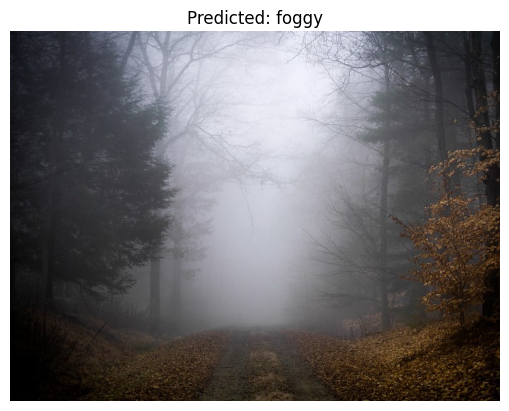

In [4]:
model = joblib.load('weather_prediction_svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')
image_path = '/kaggle/input/multiclass-weather-dataset/dataset/foggy/foggy10.jpg'
try:
    prediction, image = predict_weather(image_path, model, label_encoder)
    print(f'The predicted weather condition is: {prediction}')
    display_predicted_image(image, prediction)
except ValueError as e:
    print(e)